In [12]:
import bz2
import json
import pandas as pd
import csv

In [2]:
# 2020 quotes for top 100 politician
with open('politician-quotes-2020_1636385127358.json', 'r') as f:
    data = json.load(f)

print(len(data['Q76']))

538


In [5]:
data["Q76"]

[{'quotation': 'Which is why you have somebody like a Greta Thunberg who gets so much traction,',
  'proba': '0.8961'},
 {'quotation': "Let's stipulate that this is all insane.", 'proba': '0.9397'},
 {'quotation': "constructed from the best of our traditions and will have to account for the darker aspects of our past... and we'll need to remind ourselves, despite all our differences, just how much we share: common hopes, common dreams, a bond that will not break",
  'proba': '0.9311'},
 {'quotation': "When I examined Judge Roberts's record and history of public service it is my personal estimation that he has far more often used his formidable skills on behalf of the strong in opposition to the weak.",
  'proba': '0.9372'},
 {'quotation': 'Harry Truman said the buck stops with you.',
  'proba': '0.9393'},
 {'quotation': 'We are going to have a science-based, fact-based approach to all of the policy steps we take.',
  'proba': '0.9022'},
 {'quotation': "if all he is doing is throwing st

In [6]:
poli_all_dict_2020 = {}
for key, quotes in data.items():
    temp = []
    for quote in quotes:
        temp.append(quote["quotation"])
    temp = " ".join(temp)
    poli_all_dict_2020[key] = temp

In [86]:
with open('./data/top100_politicians_by_party.json', 'r') as f:
    data = json.load(f)

dem_df = pd.DataFrame(data["dem"])
rep_df = pd.DataFrame(data["rep"])
dem_df['party'] = "dem"
rep_df['party'] = "rep"

In [89]:
politician_wiki = pd.concat([dem_df, rep_df])

In [65]:
len(poli_all_dict_2020)

200

In [75]:
name_quote = {}
# for qid, quote in poli_all_dict_2020.items():
dem_df.head()


,item,itemLabel,genderLabel,citizenshipLabel,languageLabel,religionLabel,ethnicLabel,degreeLabel,dateOfBirth,placeOfBirthLabel,memberOfParty,memberOfPartyLabel
0,Q76,Barack Obama,male,United States of America,English,"[Congregationalist polity, United Church of Ch...",African Americans,"[Bachelor of Arts, Juris Doctor]",1961-08-04T00:00:00Z,Kapiolani Medical Center for Women and Children,http://www.wikidata.org/entity/Q29552,Democratic Party
1,Q6294,Hillary Clinton,female,United States of America,English,Methodism,NaN,"[Juris Doctor, bachelor's degree]",1947-10-26T00:00:00Z,Edgewater Hospital,http://www.wikidata.org/entity/Q29552,Democratic Party
2,Q359442,Bernie Sanders,male,United States of America,English,Judaism,Jewish people,Bachelor of Arts,1941-09-08T00:00:00Z,Brooklyn,"[http://www.wikidata.org/entity/Q327591, http:...","[independent politician, Liberty Union Party, ..."
3,Q170581,Nancy Pelosi,female,United States of America,English,Catholicism,Italian American,NaN,1940-03-26T00:00:00Z,Baltimore,http://www.wikidata.org/entity/Q29552,Democratic Party
4,Q11673,Andrew Cuomo,male,United States of America,English,Catholicism,Italian American,Juris Doctor,1957-12-06T00:00:00Z,Queens,http://www.wikidata.org/entity/Q29552,Democratic Party


In [66]:
# header = ['name', 'area', 'country_code2', 'country_code3']
# data = ['Afghanistan', 652090, 'AF', 'AFG']

with open('2020data1.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["qid", "quote"])
    for qid, quote in poli_all_dict_2020.items():
        if len(quote) >= 30:
            threshold = 5000
            if len(quote) >= threshold:
                quote = quote[:threshold]
            writer.writerow([qid, quote])



In [67]:
liwc = pd.read_csv('Results_2020data1.csv')

In [68]:
len(liwc)

200

In [69]:
import helpers1

In [73]:
bigfive = helpers1.predict_personality(liwc)

In [111]:
bigfive

,N,E,O,A,C
0,0.006731,0.031773,-0.053769,0.058799,-0.010156
1,0.009280,0.030271,-0.053616,0.059951,-0.008561
2,0.012805,0.030173,-0.062154,0.053043,-0.009680
3,0.011554,0.027291,-0.050079,0.050125,-0.014437
4,0.006725,0.034320,-0.070285,0.061503,-0.008989
...,...,...,...,...,...
195,0.001335,0.039147,-0.060989,0.071172,0.001739
196,0.006000,0.020000,-0.014000,0.032000,-0.034000
197,0.024140,0.014819,-0.049995,0.053093,-0.025177
198,0.019383,0.027495,-0.038111,0.050304,-0.019069


In [79]:
liwc.columns

Index(['Source (A)', 'Source (B)', 'WC', 'WPS', 'Sixltr', 'Dic', 'Pronoun',
       'I', 'We', 'Self', 'You', 'Other', 'Negate', 'Assent', 'Article',
       'Preps', 'Number', 'Affect', 'Posemo', 'Posfeel', 'Optim', 'Negemo',
       'Anx', 'Anger', 'Sad', 'Cogmech', 'Cause', 'Insight', 'Discrep',
       'Inhib', 'Tentat', 'Certain', 'Senses', 'See', 'Hear', 'Feel', 'Social',
       'Comm', 'Othref', 'Friends', 'Family', 'Humans', 'Time', 'Past',
       'Present', 'Future', 'Space', 'Up', 'Down', 'Incl', 'Excl', 'Motion',
       'Occup', 'School', 'Job', 'Achieve', 'Leisure', 'Home', 'Sports', 'TV',
       'Music', 'Money', 'Metaph', 'Relig', 'Death', 'Physcal', 'Body',
       'Sexual', 'Eating', 'Sleep', 'Groom', 'Swear', 'Nonfl', 'Fillers',
       'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam',
       'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP'],
      dtype='object')

In [76]:
df1 = pd.concat([liwc, bigfive], axis=1)

In [97]:
df1.head()

,Source (A),Source (B),WC,WPS,Sixltr,Dic,Pronoun,I,We,Self,...,Dash,Quote,Apostro,Parenth,OtherP,N,E,O,A,C
0,Q473239,And they are working towards delivering their ...,827,21.21,26.60,67.96,9.67,1.21,3.39,4.59,...,0.48,0.0,2.78,0.24,0.97,0.006731,0.031773,-0.053769,0.058799,-0.010156
1,Q24015,are doing exactly what we hoped for. I've been...,878,36.58,22.21,71.75,9.11,2.16,3.64,5.81,...,1.37,0.0,1.82,0.23,0.34,0.009280,0.030271,-0.053616,0.059951,-0.008561
2,Q1124,comprehensive AIDS vaccine research initiative...,889,18.52,20.47,75.25,13.95,4.72,2.25,6.97,...,1.01,0.0,4.05,0.00,1.12,0.012805,0.030173,-0.062154,0.053043,-0.009680
3,Q170581,cross a very important threshold in American h...,873,21.29,22.11,72.39,9.39,1.26,2.75,4.01,...,1.37,0.0,2.41,0.00,1.15,0.011554,0.027291,-0.050079,0.050125,-0.014437
4,Q1431761,He's 21 or 22 years old so I'm not too worried...,908,23.89,17.29,74.01,12.44,2.97,3.19,6.17,...,0.77,0.0,4.41,0.00,0.66,0.006725,0.034320,-0.070285,0.061503,-0.008989


In [90]:
df2 = df1.merge(politician_wiki, left_on='Source (A)', right_on='item', how = "left")

In [91]:
df2

,Source (A),Source (B),WC,WPS,Sixltr,Dic,Pronoun,I,We,Self,...,citizenshipLabel,languageLabel,religionLabel,ethnicLabel,degreeLabel,dateOfBirth,placeOfBirthLabel,memberOfParty,memberOfPartyLabel,party
0,Q473239,And they are working towards delivering their ...,827,21.21,26.60,67.96,9.67,1.21,3.39,4.59,...,United States of America,English,Presbyterianism,NaN,NaN,1963-12-30T00:00:00Z,Orange,http://www.wikidata.org/entity/Q29468,Republican Party,rep
1,Q24015,are doing exactly what we hoped for. I've been...,878,36.58,22.21,71.75,9.11,2.16,3.64,5.81,...,United States of America,NaN,NaN,NaN,NaN,1966-04-11T00:00:00Z,Missoula,http://www.wikidata.org/entity/Q29552,Democratic Party,dem
2,Q1124,comprehensive AIDS vaccine research initiative...,889,18.52,20.47,75.25,13.95,4.72,2.25,6.97,...,United States of America,English,Baptists,white people,NaN,1946-08-19T00:00:00Z,Hope,http://www.wikidata.org/entity/Q29552,Democratic Party,dem
3,Q170581,cross a very important threshold in American h...,873,21.29,22.11,72.39,9.39,1.26,2.75,4.01,...,United States of America,English,Catholicism,Italian American,NaN,1940-03-26T00:00:00Z,Baltimore,http://www.wikidata.org/entity/Q29552,Democratic Party,dem
4,Q1431761,He's 21 or 22 years old so I'm not too worried...,908,23.89,17.29,74.01,12.44,2.97,3.19,6.17,...,United States of America,NaN,NaN,NaN,NaN,1948-05-10T00:00:00Z,Butler,http://www.wikidata.org/entity/Q29468,Republican Party,rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Q881196,"Maine women, not white women. Partnering with ...",320,21.33,26.88,78.12,10.62,2.81,5.62,8.44,...,United States of America,French,NaN,NaN,NaN,1948-10-09T00:00:00Z,Lewiston,http://www.wikidata.org/entity/Q29468,Republican Party,rep
196,Q7437083,"an area that is absolutely essential,",6,6.00,33.33,83.33,0.00,0.00,0.00,0.00,...,United States of America,NaN,NaN,NaN,NaN,1968-05-09T00:00:00Z,Danville,http://www.wikidata.org/entity/Q29468,Republican Party,rep
197,Q513091,"We ran into stone walls, Voluntary participati...",27,27.00,29.63,66.67,3.70,0.00,3.70,3.70,...,United States of America,NaN,Presbyterianism,NaN,NaN,1947-01-26T00:00:00Z,Minneapolis,"[http://www.wikidata.org/entity/Q1937395, http...","[Minnesota Democraticâ€“Farmerâ€“Labor Party, ...",dem
198,Q4772543,Airline passengers deserve to have access to c...,28,28.00,28.57,67.86,7.14,0.00,0.00,0.00,...,United States of America,NaN,NaN,African Americans,law degree,1971-04-30T00:00:00Z,Charlotte,http://www.wikidata.org/entity/Q29552,Democratic Party,dem


In [95]:
df1.columns

Index(['Source (A)', 'Source (B)', 'WC', 'WPS', 'Sixltr', 'Dic', 'Pronoun',
       'I', 'We', 'Self', 'You', 'Other', 'Negate', 'Assent', 'Article',
       'Preps', 'Number', 'Affect', 'Posemo', 'Posfeel', 'Optim', 'Negemo',
       'Anx', 'Anger', 'Sad', 'Cogmech', 'Cause', 'Insight', 'Discrep',
       'Inhib', 'Tentat', 'Certain', 'Senses', 'See', 'Hear', 'Feel', 'Social',
       'Comm', 'Othref', 'Friends', 'Family', 'Humans', 'Time', 'Past',
       'Present', 'Future', 'Space', 'Up', 'Down', 'Incl', 'Excl', 'Motion',
       'Occup', 'School', 'Job', 'Achieve', 'Leisure', 'Home', 'Sports', 'TV',
       'Music', 'Money', 'Metaph', 'Relig', 'Death', 'Physcal', 'Body',
       'Sexual', 'Eating', 'Sleep', 'Groom', 'Swear', 'Nonfl', 'Fillers',
       'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam',
       'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP', 'N', 'E', 'O', 'A',
       'C'],
      dtype='object')

In [98]:
politician_wiki.head()

,item,itemLabel,genderLabel,citizenshipLabel,languageLabel,religionLabel,ethnicLabel,degreeLabel,dateOfBirth,placeOfBirthLabel,memberOfParty,memberOfPartyLabel,party
0,Q76,Barack Obama,male,United States of America,English,"[Congregationalist polity, United Church of Ch...",African Americans,"[Bachelor of Arts, Juris Doctor]",1961-08-04T00:00:00Z,Kapiolani Medical Center for Women and Children,http://www.wikidata.org/entity/Q29552,Democratic Party,dem
1,Q6294,Hillary Clinton,female,United States of America,English,Methodism,NaN,"[Juris Doctor, bachelor's degree]",1947-10-26T00:00:00Z,Edgewater Hospital,http://www.wikidata.org/entity/Q29552,Democratic Party,dem
2,Q359442,Bernie Sanders,male,United States of America,English,Judaism,Jewish people,Bachelor of Arts,1941-09-08T00:00:00Z,Brooklyn,"[http://www.wikidata.org/entity/Q327591, http:...","[independent politician, Liberty Union Party, ...",dem
3,Q170581,Nancy Pelosi,female,United States of America,English,Catholicism,Italian American,NaN,1940-03-26T00:00:00Z,Baltimore,http://www.wikidata.org/entity/Q29552,Democratic Party,dem
4,Q11673,Andrew Cuomo,male,United States of America,English,Catholicism,Italian American,Juris Doctor,1957-12-06T00:00:00Z,Queens,http://www.wikidata.org/entity/Q29552,Democratic Party,dem


In [93]:
# df3
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [103]:
# In general, the personality of politician
df_simple = df2[["N", "E", "O", "A", "C", "itemLabel", "party", "genderLabel"]]

In [ ]:
ax = sns.barplot(x="N", y="IncomePerCap", data=df_simple)

In [ ]:
ax = sns.boxplot(x=, y="worldwide_gross", data=df2)

In [110]:
df_bar

,N,E,O,A,C
0,0.006731,0.031773,-0.053769,0.058799,-0.010156
1,0.009280,0.030271,-0.053616,0.059951,-0.008561
2,0.012805,0.030173,-0.062154,0.053043,-0.009680
3,0.011554,0.027291,-0.050079,0.050125,-0.014437
4,0.006725,0.034320,-0.070285,0.061503,-0.008989
...,...,...,...,...,...
195,0.001335,0.039147,-0.060989,0.071172,0.001739
196,0.006000,0.020000,-0.014000,0.032000,-0.034000
197,0.024140,0.014819,-0.049995,0.053093,-0.025177
198,0.019383,0.027495,-0.038111,0.050304,-0.019069


<AxesSubplot:ylabel='Frequency'>

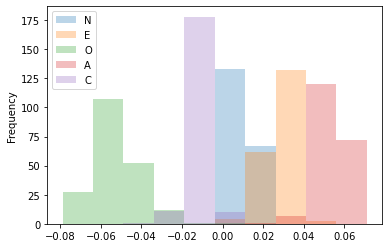

In [109]:
df_bar = df_simple[["N", "E", "O", "A", "C"]]
df_bar.plot.hist(alpha=0.3)